Simple example of using evolution strategies inside `es.py` for toy deterministic fitness function.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cma
from es import SimpleGA, CMAES, PEPG, OpenES

In [2]:
# from https://github.com/CMA-ES/pycma/blob/master/cma/fitness_functions.py
def rastrigin(x):
  """Rastrigin test objective function, shifted by 10. units away from origin"""
  x = np.copy(x)
  x -= 10.0
  if not np.isscalar(x[0]):
    N = len(x[0])
    return -np.array([10 * N + sum(xi**2 - 10 * np.cos(2 * np.pi * xi)) for xi in x])
  N = len(x)
  return -(10 * N + sum(x**2 - 10 * np.cos(2 * np.pi * x)))

fit_func = rastrigin

In [3]:
NPARAMS = 100        # make this a 100-dimensinal problem.
NPOPULATION = 101    # use population size of 101.
MAX_ITERATION = 4000 # run each solver for 5000 generations.

In [4]:
# defines a function to use solver to solve fit_func
def test_solver(solver):
  history = []
  for j in range(MAX_ITERATION):
    solutions = solver.ask()
    fitness_list = np.zeros(solver.popsize)
    for i in range(solver.popsize):
      fitness_list[i] = fit_func(solutions[i])
    solver.tell(fitness_list)
    result = solver.result() # first element is the best solution, second element is the best fitness
    history.append(result[1])
    if (j+1) % 100 == 0:
      print("fitness at iteration", (j+1), result[1])
  print("local optimum discovered by solver:\n", result[0])
  print("fitness score at this local optimum:", result[1])
  return history

In [5]:
x = np.zeros(NPARAMS) # 100-dimensional problem
print("This is F(0):")
print(rastrigin(x))

This is F(0):
-10000.0


In [6]:
x = np.ones(NPARAMS)*10. # 100-dimensional problem
print(rastrigin(x))
print("global optimum point:\n", x)

-0.0
global optimum point:
 [10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.]


In [7]:
# defines genetic algorithm solver
ga = SimpleGA(NPARAMS,                # number of model parameters
               sigma_init=0.5,        # initial standard deviation
               popsize=NPOPULATION,   # population size
               elite_ratio=0.1,       # percentage of the elites
               forget_best=False,     # forget the historical best elites
               weight_decay=0.00,     # weight decay coefficient
              )

In [8]:
ga_history = test_solver(ga)

fitness at iteration 100 -1243.7919648275058
fitness at iteration 200 -1087.621210559343
fitness at iteration 300 -1012.8393302510586
fitness at iteration 400 -995.2645814033796
fitness at iteration 500 -939.384221367675
fitness at iteration 600 -885.3358438638262
fitness at iteration 700 -881.706286936519
fitness at iteration 800 -808.9100271474008
fitness at iteration 900 -794.7110716310312
fitness at iteration 1000 -718.7429480026713
fitness at iteration 1100 -711.6877142741688
fitness at iteration 1200 -633.552565953665
fitness at iteration 1300 -611.8140401187281
fitness at iteration 1400 -588.1378065946517
fitness at iteration 1500 -525.4296341479092
fitness at iteration 1600 -480.35514269322994
fitness at iteration 1700 -433.53225357781605
fitness at iteration 1800 -383.0935849263367
fitness at iteration 1900 -357.2053004898378
fitness at iteration 2000 -328.5782008878173
fitness at iteration 2100 -294.80681172917946
fitness at iteration 2200 -279.06080155743757
fitness at itera

In [9]:
# defines CMA-ES algorithm solver
cmaes = CMAES(NPARAMS,
              popsize=NPOPULATION,
              weight_decay=0.0,
              sigma_init = 0.5
          )

(50_w,101)-aCMA-ES (mu_w=27.2,w_1=8%) in dimension 100 (seed=177439, Wed Jul 29 14:33:49 2020)


In [10]:
cma_history = test_solver(cmaes)

fitness at iteration 100 -977.9465951189828
fitness at iteration 200 -845.5211970662106
fitness at iteration 300 -845.5211970662106
fitness at iteration 400 -81.5092382907726
fitness at iteration 500 -46.785343787182114
fitness at iteration 600 -46.76308998029731
fitness at iteration 700 -46.76307066134575
fitness at iteration 800 -46.76307064557727
fitness at iteration 900 -46.76307064556579
fitness at iteration 1000 -46.76307064556579
fitness at iteration 1100 -46.76307064556579
fitness at iteration 1200 -46.76307064556579
fitness at iteration 1300 -46.76307064556579
fitness at iteration 1400 -46.76307064556579
fitness at iteration 1500 -46.76307064556579
fitness at iteration 1600 -46.76307064556579
fitness at iteration 1700 -46.76307064556579
fitness at iteration 1800 -46.76307064556579
fitness at iteration 1900 -46.76307064556579
fitness at iteration 2000 -46.76307064556579
fitness at iteration 2100 -46.76307064556579
fitness at iteration 2200 -46.76307064556579
fitness at iteratio

In [18]:
# defines PEPG (NES) solver
pepg = PEPG(NPARAMS,                         # number of model parameters
            sigma_init=0.5,                  # initial standard deviation
            learning_rate=0.1,               # learning rate for standard deviation
            learning_rate_decay=1.0,       # don't anneal the learning rate
            popsize=NPOPULATION,             # population size
            average_baseline=False,          # set baseline to average of batch
            weight_decay=0.00,            # weight decay coefficient
            rank_fitness=False,           # use rank rather than fitness numbers
            forget_best=False)            # don't keep the historical best solution)

In [19]:
pepg_history = test_solver(pepg)

fitness at iteration 100 -3719.1865414691392
fitness at iteration 200 -1316.2958744499183
fitness at iteration 300 -956.3668814812577
fitness at iteration 400 -847.2011652932144
fitness at iteration 500 -595.2971507765411
fitness at iteration 600 -477.00724339135013
fitness at iteration 700 -317.1400491816288
fitness at iteration 800 -266.3120364780318
fitness at iteration 900 -214.13546038874904
fitness at iteration 1000 -204.28085546700743
fitness at iteration 1100 -201.69642070825864
fitness at iteration 1200 -169.5098172028479
fitness at iteration 1300 -161.0622245021616
fitness at iteration 1400 -152.16861193182
fitness at iteration 1500 -148.71276214218744
fitness at iteration 1600 -146.2232028152847
fitness at iteration 1700 -144.1442610828002
fitness at iteration 1800 -143.5684590440053
fitness at iteration 1900 -142.61503349853137
fitness at iteration 2000 -142.29973044577605
fitness at iteration 2100 -141.70030982640856
fitness at iteration 2200 -141.58084560556085
fitness at

In [14]:
# defines OpenAI's ES algorithm solver. Note that we needed to anneal the sigma parameter
oes = OpenES(NPARAMS,                  # number of model parameters
            sigma_init=0.5,            # initial standard deviation
            sigma_decay=0.999,         # don't anneal standard deviation
            learning_rate=0.1,         # learning rate for standard deviation
            learning_rate_decay = 1.0, # annealing the learning rate
            popsize=NPOPULATION,       # population size
            antithetic=False,          # whether to use antithetic sampling
            weight_decay=0.00,         # weight decay coefficient
            rank_fitness=False,        # use rank rather than fitness numbers
            forget_best=False)

In [15]:
oes_history = test_solver(oes)

fitness at iteration 100 -2567.795931727651
fitness at iteration 200 -807.3235864492082
fitness at iteration 300 -807.3235864492082
fitness at iteration 400 -807.3235864492082
fitness at iteration 500 -807.3235864492082
fitness at iteration 600 -777.9210382578419
fitness at iteration 700 -733.1612170024359
fitness at iteration 800 -622.9398753965481
fitness at iteration 900 -605.780704322427
fitness at iteration 1000 -529.6307431075263
fitness at iteration 1100 -500.6194670561729
fitness at iteration 1200 -468.5335325711476
fitness at iteration 1300 -396.1126050872873
fitness at iteration 1400 -368.36130666743554
fitness at iteration 1500 -315.68685349508144
fitness at iteration 1600 -305.74822235015654
fitness at iteration 1700 -283.81729790869065
fitness at iteration 1800 -265.20950308954264
fitness at iteration 1900 -254.428258924327
fitness at iteration 2000 -238.0995660230485
fitness at iteration 2100 -224.0384597939326
fitness at iteration 2200 -210.4556378887196
fitness at itera

In [16]:
# defines OpenAI's ES algorithm solver. Note that we needed to anneal the sigma parameter
# this version turns on antithetic sampling. It doesn't really help, and sometimes hurts performance.
oes_antithetic = OpenES(NPARAMS,            # number of model parameters
                 sigma_init=0.5,            # initial standard deviation
                 sigma_decay=0.999,         # don't anneal standard deviation
                 learning_rate=0.1,         # learning rate for standard deviation
                 learning_rate_decay=1.0,   # annealing the learning rate
                 popsize=NPOPULATION+1,     # population size
                 antithetic=True,           # whether to use antithetic sampling
                 weight_decay=0.00,         # weight decay coefficient
                 rank_fitness=False,        # use rank rather than fitness numbers
                 forget_best=False)

In [17]:
oes_antithetic_history = test_solver(oes_antithetic)

fitness at iteration 100 -3251.0579946534485
fitness at iteration 200 -879.7558649204608
fitness at iteration 300 -826.8908936434227
fitness at iteration 400 -826.8908936434227
fitness at iteration 500 -786.928790067637
fitness at iteration 600 -745.8327248649762
fitness at iteration 700 -680.648865229072
fitness at iteration 800 -636.8747515486568
fitness at iteration 900 -574.9824990242186
fitness at iteration 1000 -528.2511795890036
fitness at iteration 1100 -463.88988050784576
fitness at iteration 1200 -410.9460137508977
fitness at iteration 1300 -350.4177971300892
fitness at iteration 1400 -350.4177971300892
fitness at iteration 1500 -327.367664711639
fitness at iteration 1600 -302.7488155495705
fitness at iteration 1700 -283.9839716709836
fitness at iteration 1800 -257.56650216923254
fitness at iteration 1900 -256.56732773418344
fitness at iteration 2000 -256.3671671879149
fitness at iteration 2100 -239.2284223471952
fitness at iteration 2200 -235.13464121773427
fitness at iterat

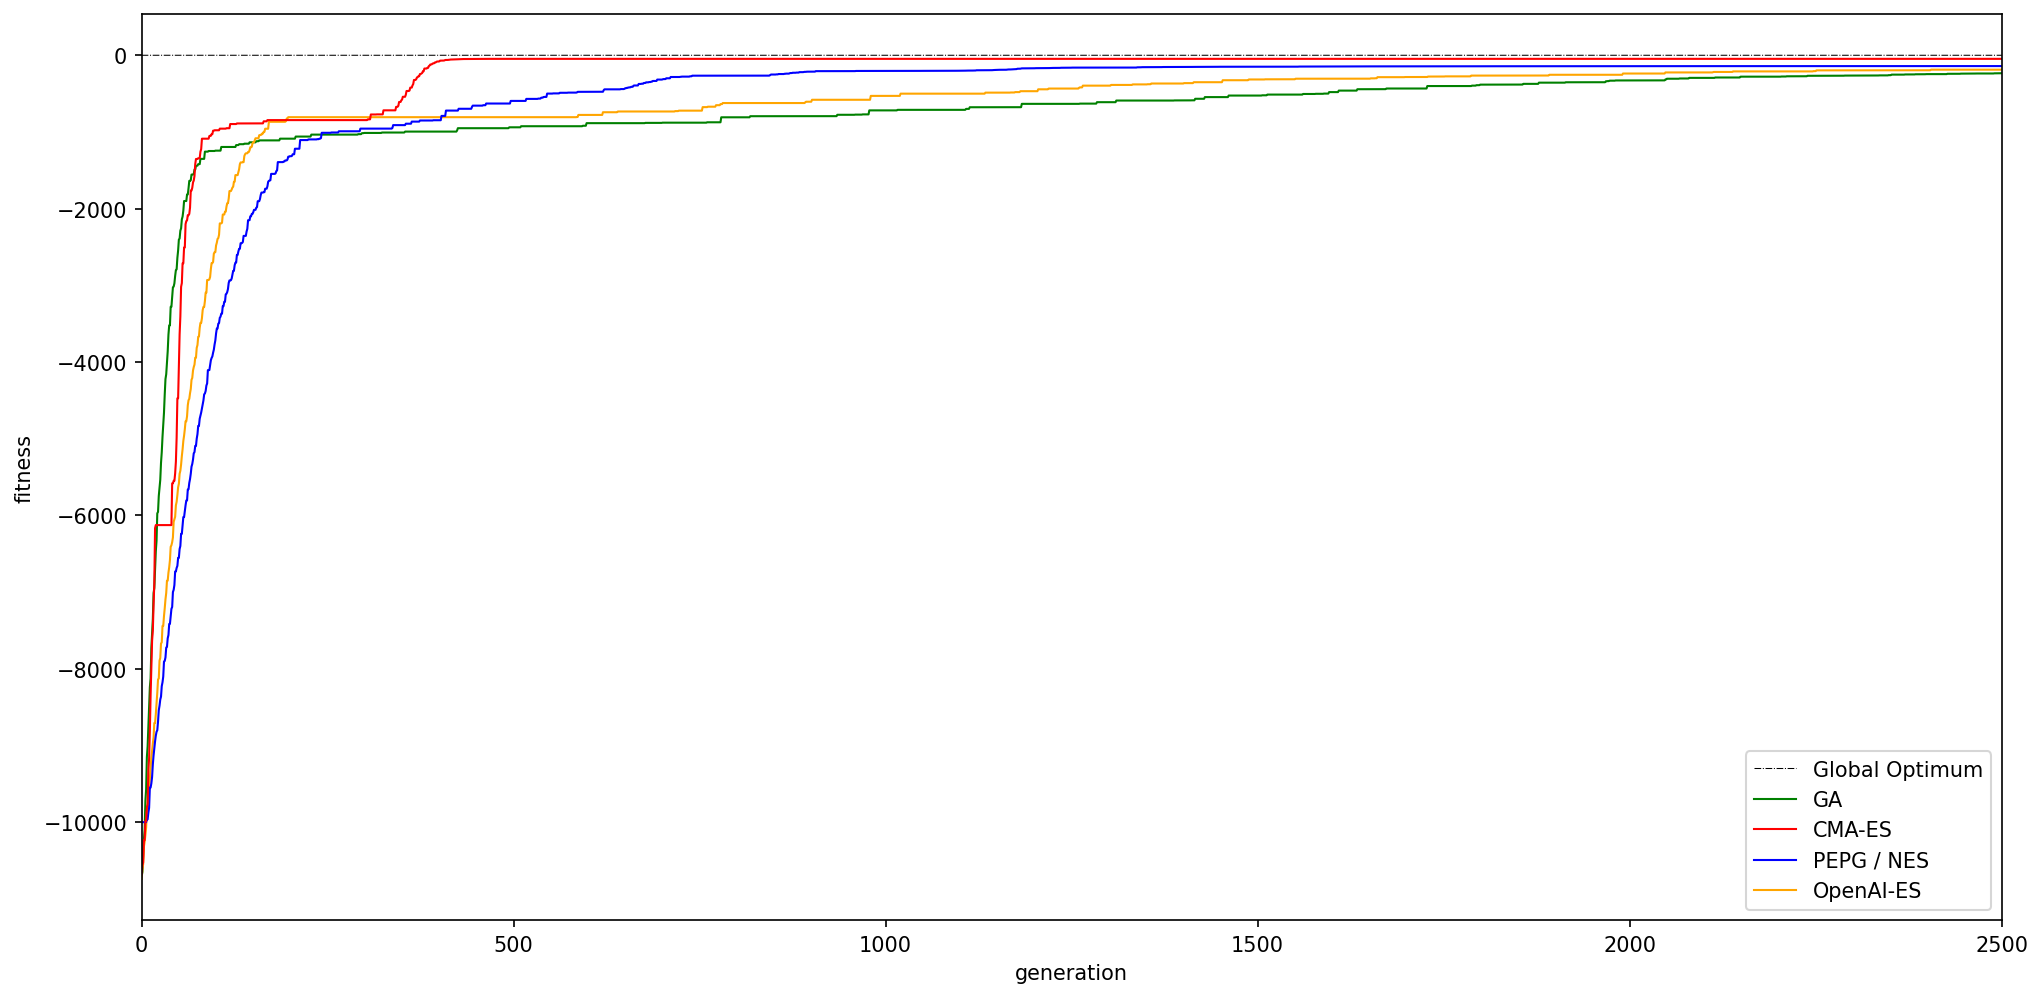

In [21]:
# Create a new figure of size 8x6 points, using 100 dots per inch
best_history = [0] * MAX_ITERATION
plt.figure(figsize=(16,8), dpi=150)

optimum_line, = plt.plot(best_history, color="black", linewidth=0.5, linestyle="-.", label='Global Optimum')
ga_line, = plt.plot(ga_history, color="green", linewidth=1.0, linestyle="-", label='GA')
oes_line, = plt.plot(oes_history, color="orange", linewidth=1.0, linestyle="-", label='OpenAI-ES')
pepg_line, = plt.plot(pepg_history, color="blue", linewidth=1.0, linestyle="-", label='PEPG / NES')
cma_line, = plt.plot(cma_history, color="red", linewidth=1.0, linestyle="-", label='CMA-ES')

plt.legend(handles=[optimum_line, ga_line, cma_line, pepg_line, oes_line], loc=4)

# Set x limits
plt.xlim(0,2500)

plt.xlabel('generation')
plt.ylabel('fitness')

# plt.savefig("./rastrigin_10d.svg")

plt.show()